This notebook demonstrates the current capabilities of the eLabInterface package. This package uses the python package provided by eLabFTW for API requests, but attempts to integrate its functions in a more user-friendly environment to facilitate the use for researchers who do not wish to be concerned with HTTP requests and the data processing required to get the data of an ELN entry into a format that can easily be used in python.

# Demo ELN entry
The following ELN entry was created as a demo entry to demonstrte the functions currently available. It is meant as a general representation of an arbitrary experiment which contains some data in diverse formats. It contains various tables in the main body, as well as attachments and makes use of other functions of eLabFTW such as steps or extra fields. Not all elements are easily accessible using eLabInterface at the moment.

![title](01.png)

# Using eLabAPI

In [1]:
import eLabAPI

## Requirements
For the eLabAPI module to work, the `elabapi-python` package needs to be installed and a virtual environment needs to be created, according to the [the documentation](https://github.com/elabftw/elabapi-python):
```
# create a virtual environment
python -m venv elab
# activate it
source elab/bin/activate
# on Windows
# C:\> elab\Scripts\activate.bat
# install the library
pip install elabapi-python
```

# Requesting an Experiment
To request an experiment, an importer is used, which sends requests to the server and reformats the response arfterwards. For the importer to work, the url of the API as well as an API key need to be provided. The API key can be generated in the user panel of eLabFTW. To not accidentally share a script with the API key in it, the key is stored in an external text file and read from this file when initiating the API.

In [2]:
importer = eLabAPI.ELNImporter(debug=True)
importer.attach_api_key_from_file("API_key.txt")
importer.configure_api(url="https://eln.elaine.uni-rostock.de/api/v2/experiments", permissions="read only")

Created instance of ELNImporter
read API key from file: API_key.txt
set API configuration: url=https://eln.elaine.uni-rostock.de/api/v2/experiments, api key=yes, permissions=read only
sending test request
requesting data: limit=1
received response for request
converting HTTPResponse...
successfully created ELNResponse object
API was successfully configured


True

To request a specific experiment, we can for example search in the title or use the internal id of the entry. Depending on the structure of your titles, searching by title might not be unambiguous. When setting `limit=1`, only one experiment will be requested from the server. You can also increase the limit to receive multiple experiments and then select the one you actually want to import.

In [3]:
# by searching in the title
experiment = importer.request(query="ELN Demo", limit=1)
print(experiment)

# by id
experiment = importer.request(advanced_query="id:5693", limit=1)
print(experiment)

requesting data: q=ELN Demo, limit=1
received response for request
converting HTTPResponse...
successfully created ELNResponse object
ELNResponse object
	id: 5693
	title: ELN Demo
	date: 2024-10-13
	elabid: 20241013-affb1138932ac5644d7c17b737919aa19a972390
	created_at: 2024-10-13 17:24:12
	modified_at: 2024-11-03 11:59:08
	status_title: Running
	fullname: Henrik Schröter
	experimentType: general
	userid: 367
	locked: 0
	requestTimeStamp: 24-11-06 14:15:45
	body: 7162 bytes
	uploads: none

requesting data: q=id:5693, limit=1
received response for request
converting HTTPResponse...
successfully created ELNResponse object
ELNResponse object
	id: 5693
	title: ELN Demo
	date: 2024-10-13
	elabid: 20241013-affb1138932ac5644d7c17b737919aa19a972390
	created_at: 2024-10-13 17:24:12
	modified_at: 2024-11-03 11:59:08
	status_title: Running
	fullname: Henrik Schröter
	experimentType: general
	userid: 367
	locked: 0
	requestTimeStamp: 24-11-06 14:15:45
	body: 7162 bytes
	uploads: none



The importer returns an `ELNResponse` object, which is the central object that can be used to further work with the imported data from now on. As you can see by the printouts, some important metadata are stored inside this object, which can be accessed by various getter methods. It is also possible to get the raw HTTP data from the server by using the optional argument `return_http_response=True` in `importer.request()`.

## Requesting attached files
Often times, larger datasets are attached to an ELN entry. These datasets can also be requested by using the following request option. The uploads are stored locally and can be opened from the ELNResponse object.

In [4]:
experiment = importer.request(advanced_query="id:5693", download_uploads=True)
print(experiment)

requesting data: q=id:5693, limit=None
received response for request
converting HTTPResponse...
successfully created ELNResponse object
requesting uploads for experiment with id 5693
received 4 uploads
wrote 4 uploads to directory: C:\Users\Henrik Schröter\Unibox Rostock\Promotion\Datenauswertung\Python\eLabInterface\Downloads\
ELNResponse object
	id: 5693
	title: ELN Demo
	date: 2024-10-13
	elabid: 20241013-affb1138932ac5644d7c17b737919aa19a972390
	created_at: 2024-10-13 17:24:12
	modified_at: 2024-11-03 11:59:08
	status_title: Running
	fullname: Henrik Schröter
	experimentType: general
	userid: 367
	locked: 0
	requestTimeStamp: 24-11-06 14:15:45
	body: 7162 bytes
	uploads: 4
	local upload directory: C:\Users\Henrik Schröter\Unibox Rostock\Promotion\Datenauswertung\Python\eLabInterface\Downloads



## Processing the response

## General Information
Upon receiving the respsonse from the server, some metadatat of ther expeiment are automatically reordered and processed. For example, the experiment type is determined by reading it from the extra fields. These metadata are stored inside a dictionary, which can be accessed by the `get_metadata()` method:

In [5]:
print("full dictionary:", experiment.get_metadata())
print("type:", experiment.get_metadata("experimentType"))
print("title:", experiment.get_metadata("title"))

full dictionary: {'id': 5693, 'title': 'ELN Demo', 'date': '2024-10-13', 'elabid': '20241013-affb1138932ac5644d7c17b737919aa19a972390', 'created_at': '2024-10-13 17:24:12', 'modified_at': '2024-11-03 11:59:08', 'status_title': 'Running', 'tags': None, 'fullname': 'Henrik Schröter', 'experimentType': 'general', 'userid': 367, 'locked': 0, 'lockedby': None, 'locked_at': None, 'requestTimeStamp': '24-11-06 14:15:45'}
type: general
title: ELN Demo


Metadata can also be set manually by the user. If an existing value is overwritten, this is noted inside the log.

In [6]:
experiment.toggle_debug(True)
experiment.add_metadata("comment", "metadata are important")
experiment.add_metadata("fullname", "Max Mustermann")

metadata element 'fullname' was overwritten by user


### Extracting Data from the Body
Data that is stored in tabular format inside the main body of the ELN entry can be extracted from the response object:

In [18]:
experiment.toggle_debug(True)
experiment.extract_tables(output_format="dataframes", decimal=",")


The data is returned as a `TabularData` object, which essentially contains the tabular data as an pandas DataFrame but can hold additional metadata, such as the title of the table. The title is automatically set, when it is specified in the first line of the table with '.' as an indicator (see above example entry). By this, tabular data can easily retreived:

In [19]:
parameter_table = experiment.return_table_as_pd("a table with some parameters")
print(parameter_table.to_string())

                  0                      1
0  temperature / °C               25 ± 0,5
1    pressure / bar                      5
2  item of interest  a beaker full of acid
3            device       the time machine
4     device method     back to the future


It is also possible to further process the data and plot some results. At the moment, the data in the columns needs to be manually converted to numeric values (this will likely change in the future). In this example, the mean and std of the absorbances noted in the ELN entry and the results are plotted against the time. Additionally, some metadata are attached to the plot as text by looking them up in the ELNResponse's metadata.

   time / h  absorbance  absorbance  absorbance  mean absorbance  \
0      0.00        0.56        0.57        0.59         0.573333   
1      0.25        0.46        0.43        0.47         0.453333   
2      0.50        0.34        0.34         NaN         0.340000   
3      2.00        0.02        0.04        0.03         0.030000   
4     24.00        0.01        0.02        0.02         0.016667   

   std absorbance  
0        0.015275  
1        0.020817  
2        0.000000  
3        0.010000  
4        0.005774  


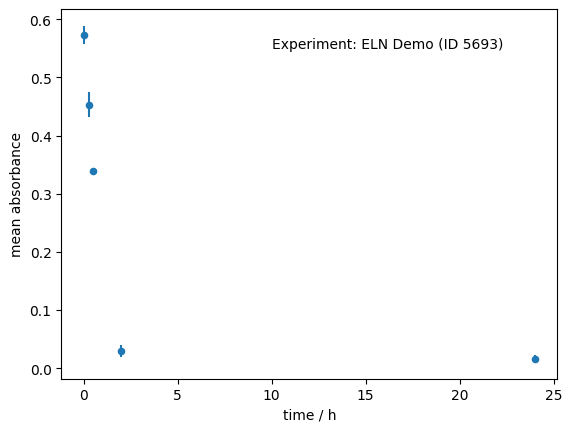

In [27]:
import pandas as pd

numeric_data = experiment.return_table_as_pd("some time-resolved measurement data")
numeric_data = numeric_data.apply(lambda i: pd.to_numeric(i, errors="coerce"))

numeric_data["mean absorbance"] = numeric_data.iloc[:, 1:4].mean(axis=1)
numeric_data["std absorbance"] = numeric_data.iloc[:, 1:4].std(axis=1)

numeric_data.plot(x="time / h", y="mean absorbance", yerr="std absorbance", kind="scatter")
plt.text(10, 0.55, f"""Experiment: {experiment.get_metadata("title")} (ID {experiment.get_metadata("id")})""")

print(numeric_data)

plt.show()

### Reading Uploads
At the moment, csv and txt files are supported. Other text-based formats such as json or yaml can also be opened as a string but need to be converted afterwards for now. Here a csv file is opened, converted to a pandas dataframe and can then be plotted.

Attached uploads:
	full_dataset.zip
	raw_data.csv
	setup.png
	result_graph.png

Filetype 'png' is not supported yet!


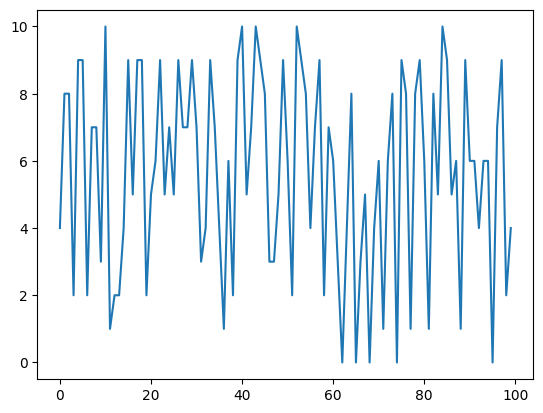

In [28]:
import matplotlib.pyplot as plt

experiment.list_uploads()
csv_data = experiment.open_upload("raw_data.csv")

plt.plot(csv_data["numberrange"])


image = experiment.open_upload("setup.png")

## Saving results
At the moment, eLabInterface only supports reading from the eLabFTW server and results can not be directly sent to the server. However, it is possible to export processed or extracted data to a file. For extracted tables, only saving tables by index is supported at the moment.

In [33]:
experiment.save_to_csv("Downloads/test.csv", 3) # selects the 4th table (index 3) in the ELN entry
numeric_data.to_csv("Downloads/test2.csv") # normal pandas functionality

## Logging
The various classes used during this workflow write logs during operation, to document processing steps or aid with debugging. By setting the option `debug=True` upon creation of `ELNImporter` or `ELNResponse` objects, the log messages will also be printed in the console. A more or less complete log of the whole process can be accessed from the ELNResponse instances. As multiple requests have been sent via the API in this example, the log might look a bit chaotic than usual.

In [36]:
print(experiment.log_to_str())
print(experiment.log_to_str("sections"))

24-11-06 14:14:33.776312	Response	USR	Attached uploads:
24-11-06 14:14:33.799297	Filemanager	USR	Filetype 'png' is not supported yet!
24-11-06 14:14:44.903508	Importer	PRC	Created instance of ELNImporter
24-11-06 14:14:44.904505	Importer	FIL	read API key from file: API_key.txt
24-11-06 14:14:44.904505	Importer	COM	set API configuration: url=https://eln.elaine.uni-rostock.de/api/v2/experiments, api key=yes, permissions=read only
24-11-06 14:14:44.904505	Importer	COM	sending test request
24-11-06 14:14:44.913499	Importer	COM	requesting data: limit=1
24-11-06 14:14:45.031426	Importer	COM	received response for request
24-11-06 14:14:45.031426	Importer	PRC	converting HTTPResponse...
24-11-06 14:14:45.031426	Importer	PRC	successfully created ELNResponse object
24-11-06 14:14:45.034424	Importer	COM	API was successfully configured
24-11-06 14:14:45.066405	Importer	COM	requesting data: q=ELN Demo, limit=1
24-11-06 14:14:45.178335	Importer	COM	received response for request
24-11-06 14:14:45.1783